In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [3]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


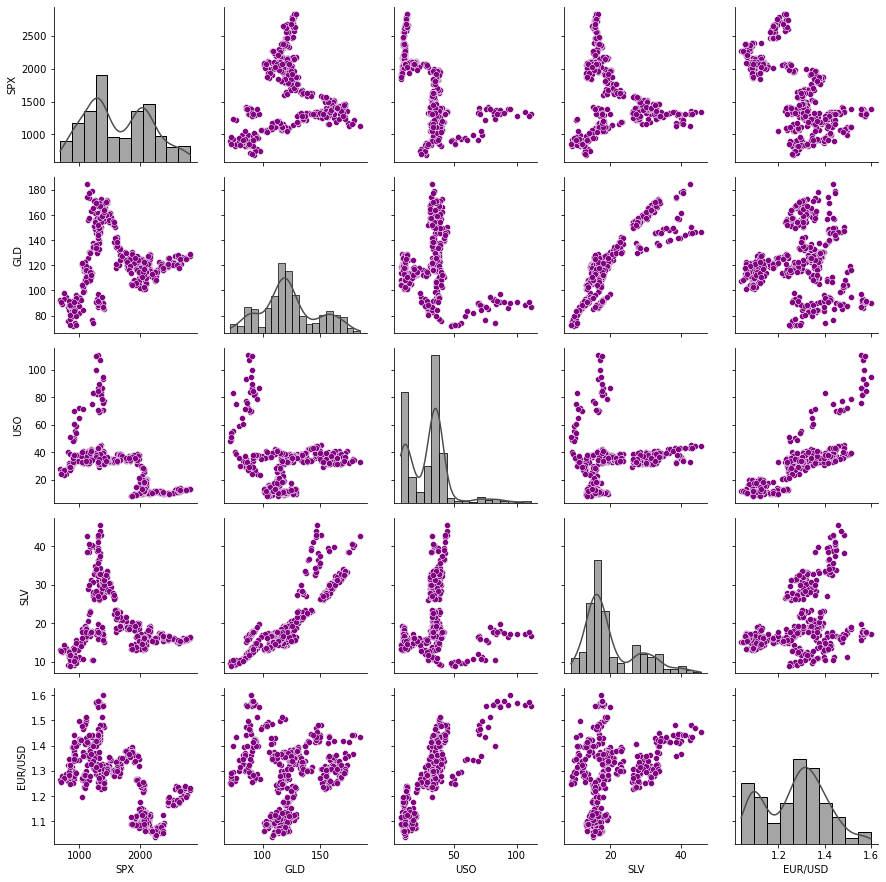

In [4]:
# مخطط يوضح لنا الكثير توزيع عناصر البيانات 
g=sns.PairGrid(data.sample(n=500))
g.map_diag(sns.histplot, kde=True,color=".3")
g.map_offdiag(sns.scatterplot,color='purple')

<AxesSubplot:>

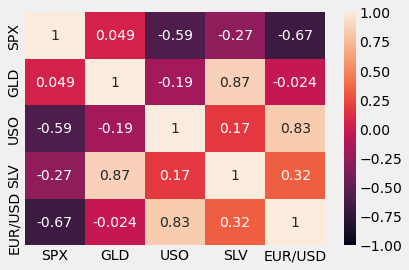

In [7]:
plt.style.use('fivethirtyeight')
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)

In [8]:
corr = data.corr()

In [9]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:xlabel='GLD', ylabel='Count'>

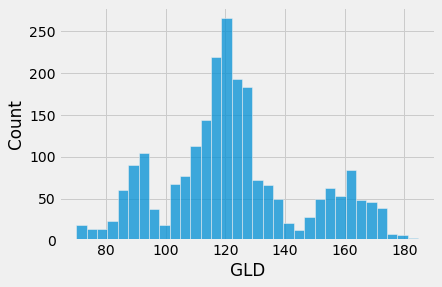

In [10]:
sns.histplot(data['GLD'])

In [11]:
X = data.drop(['Date','GLD'],axis=1)
y = data['GLD']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
rf = RandomForestRegressor(n_estimators=100)


In [20]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
pred = rf.predict(X_test)

In [23]:
err = metrics.r2_score(y_test,pred)

In [24]:
err

0.9887863342371751

In [26]:
gold_predicted = rf.predict([[1447.160034,78.470001,15.180,1.471692]])
print(gold_predicted)

[85.11450038]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
